# NYS Mesonet data 

### Available time range: 01/01/2017-12/31/2020

### Temporal resolution: hourly averages


### Locations: 126 stations


### Meteorological observed variables include:
 - temperature
 - relative humidity
 - precipitation
 - wind 
 - solar insolation
 
### Data format: 
Data are arranged in form of a spreadsheet table.
Rows are used to store the temporal data samples, colulmns are used to
orangize the observations into meteorological variables.


In [237]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt 
import pandas as pd
import datetime as dt 


%matplotlib inline

In [161]:
shared_data_folder = "/home11/staff/timm/Public/Data/"
subfolder = "MESONET/"

years = [ '%4.4d' %(yr+2017) for yr in range (4) ]
months = [ '%2.2d' %(m+1) for m in range(12) ]

filename = years[3]+months[1]+'.csv'
print(filename)

folder = shared_data_folder+subfolder 
print("open file "+folder+filename)

df=pd.read_csv(folder+filename)
df.head()

202002.csv
open file /home11/staff/timm/Public/Data/MESONET/202002.csv


,station,time_end,temp_2m_max [degC],temp_2m_min [degC],temp_2m_avg [degC],relative_humidity_max [percent],relative_humidity_min [percent],relative_humidity_avg [percent],precip_incremental [mm],precip_max_intensity_max [mm/min],wind_speed_sonic_avg [m/s],wind_speed_sonic_max [m/s],wind_direction_sonic_avg [degrees],solar_insolation_total [MJ/m^2]
0,ADDI,2020-02-01 01:00:00 EST,-1.3,-1.6,-1.4,94.0,93.2,93.7,0.0,0.0,1.5,3.2,168.1,0.0
1,ADDI,2020-02-01 02:00:00 EST,-1.3,-1.3,-1.3,93.7,93.0,93.3,0.0,0.0,0.7,1.9,155.7,0.0
2,ADDI,2020-02-01 03:00:00 EST,-1.2,-1.3,-1.2,93.4,92.8,93.1,0.0,0.0,1.1,2.1,157.8,0.0
3,ADDI,2020-02-01 04:00:00 EST,-1.1,-1.2,-1.2,93.1,92.7,92.9,0.0,0.0,1.5,2.6,161.4,0.0
4,ADDI,2020-02-01 05:00:00 EST,-1.0,-1.1,-1.1,93.3,93.0,93.2,0.0,0.0,1.8,2.9,168.8,0.0


In [162]:
dfg = df.groupby("station")
station_ids = dfg.groups.keys()

# Stations

In [208]:
#COLD BROOK
cold = dfg.get_group("COLD")

#SARANAC
sara = dfg.get_group("SARA")

In [183]:
def time_support(timestring):
    """helper function to deal with the EST and EDT time zone problem
    
    Input parameter:
        a string with date string (obtained from csv files)
        
    Return value:
        datetime object that include a time zone information"""
    if timestring.upper().find("EST")>0:
        #print ("Standard time: set timezone with UTC offset -5")
        ny_tz = dt.timezone(dt.timedelta(hours=-5))
    elif timestring.upper().find("EDT")>0:
        #print ("Daylight savings time: set timezone with UTC offset -4")
        ny_tz = dt.timezone(dt.timedelta(hours=-4))
    #print("test:" , timestring[0:10])
    t=dt.datetime.strptime(timestring[0:19],'%Y-%m-%d %H:%M:%S')
    t=dt.datetime(t.year,t.month,t.day, t.hour, t.minute, t.second,tzinfo=ny_tz)
    return t

In [184]:
ntime=sara.shape[0] 
n=0
mytime=[]
while n<ntime:
    timestring=sara['time_end'].iloc[n]
    thelp=time_support(timestring)
    mytime.append(thelp)
    n=n+1
time=np.array(mytime)

# Calling Data

In [186]:
#average hourly humidity
ahum_cold = cold["relative_humidity_avg [percent]"]
ahum_sara = sara["relative_humidity_avg [percent]"]

#average hourly wind direction
awnd_cold = cold["wind_direction_sonic_avg [degrees]"]
awnd_sara = sara["wind_direction_sonic_avg [degrees]"]

#average hourly wind speed
aspd_cold = cold["wind_speed_sonic_avg [m/s]"]
aspd_sara = sara["wind_speed_sonic_avg [m/s]"]

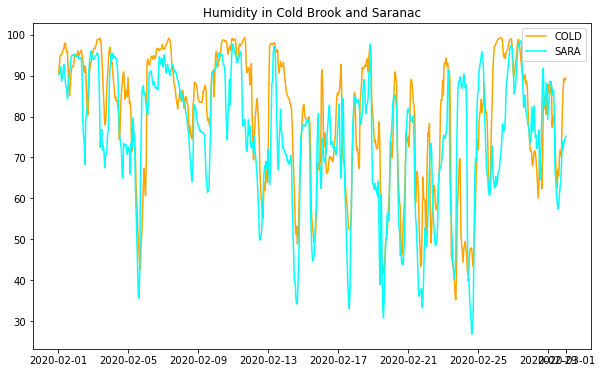

In [209]:
%matplotlib inline

fig=plt.figure(figsize=(10,6))
plt.plot(time,ahum_cold,color='orange',label='COLD')
plt.plot(time,ahum_sara,color='cyan',label='SARA')
plt.title("Humidity in Cold Brook and Saranac")
plt.legend()

In [188]:
ahum_cold_a = np.array(ahum_cold)
ahum_sara_a = np.array(ahum_sara)

line = []
i = 0
for v in time: 
    if ahum_cold_a[i] > ahum_sara_a[i]:
        line.append(50)
    else:
        line.append(40)
    i=i+1

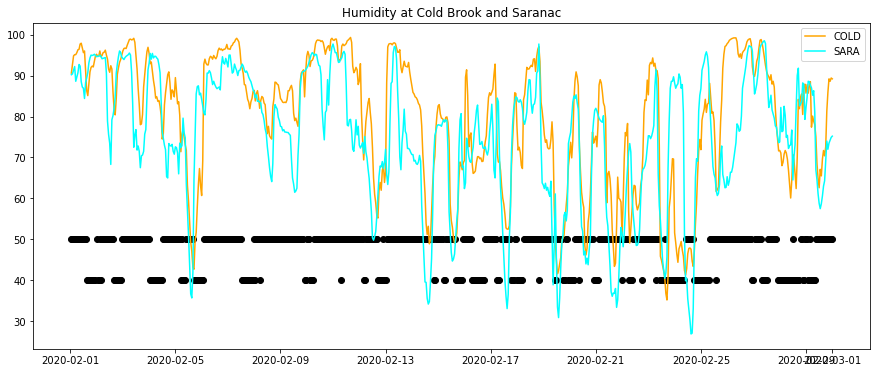

In [241]:
fig=plt.figure(figsize=(15,6))
plt.plot(time,ahum_cold,color='orange',label='COLD')
plt.plot(time,ahum_sara,color='cyan',label='SARA')
plt.scatter(time,line,color='black')
plt.title("Humidity at Cold Brook and Saranac")
plt.legend()

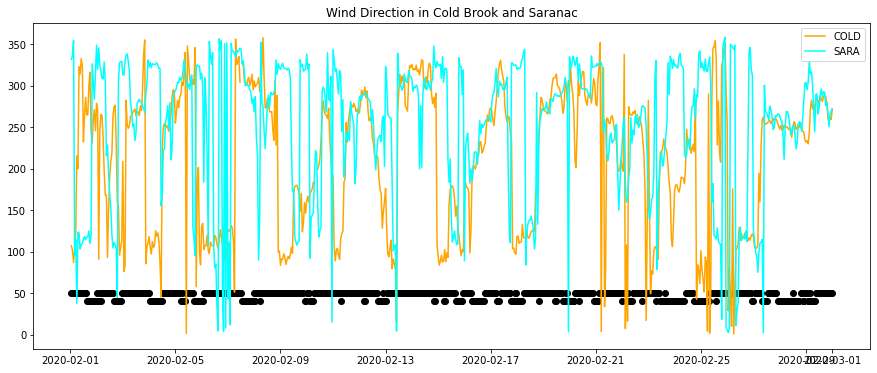

In [211]:
fig=plt.figure(figsize=(15,6))
plt.plot(time,awnd_cold,color='orange',label='COLD')
plt.plot(time,awnd_sara,color='cyan',label='SARA')
plt.scatter(time,line,color='black')
plt.title("Wind Direction in Cold Brook and Saranac")
plt.legend()

In [196]:
line300=[]
i=0
for v in line:
    if v >= 0:
        line300.append(300)
    i=i+1
    
line100=[]
i=0
for v in line:
    if v>=0:
        line100.append(100)
    i=i+1

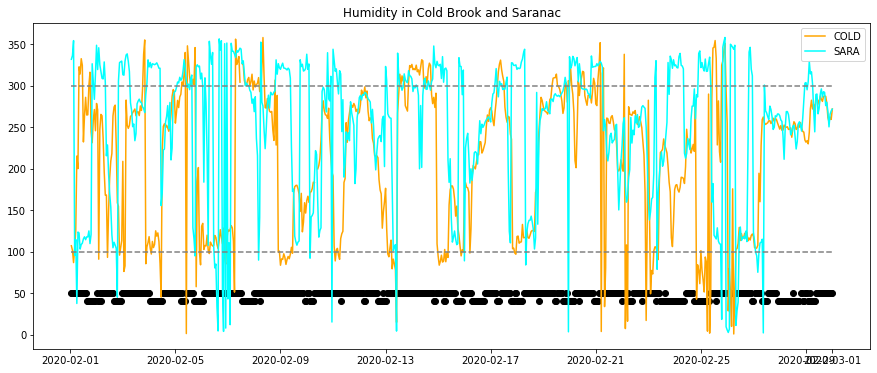

In [212]:
fig=plt.figure(figsize=(15,6))
plt.plot(time,awnd_cold,color='orange',label='COLD')
plt.plot(time,awnd_sara,color='cyan',label='SARA')
plt.scatter(time,line,color='black')
plt.plot(time,line300,color='gray',linestyle='dashed')
plt.plot(time,line100,color='gray',linestyle='dashed')
plt.title("Humidity in Cold Brook and Saranac")
plt.legend()

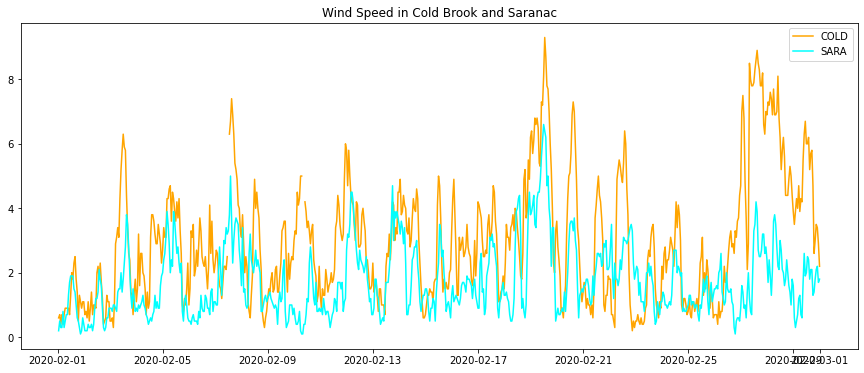

In [213]:
fig=plt.figure(figsize=(15,6))
plt.plot(time,aspd_cold,color='orange',label='COLD')
plt.plot(time,aspd_sara,color='cyan',label='SARA')
plt.title("Wind Speed in Cold Brook and Saranac")
plt.legend()

In [200]:
sara_nan = np.where(aspd_sara<0.5,np.nan,awnd_sara)
cold_nan = np.where(aspd_cold<0.5,np.nan,awnd_cold)

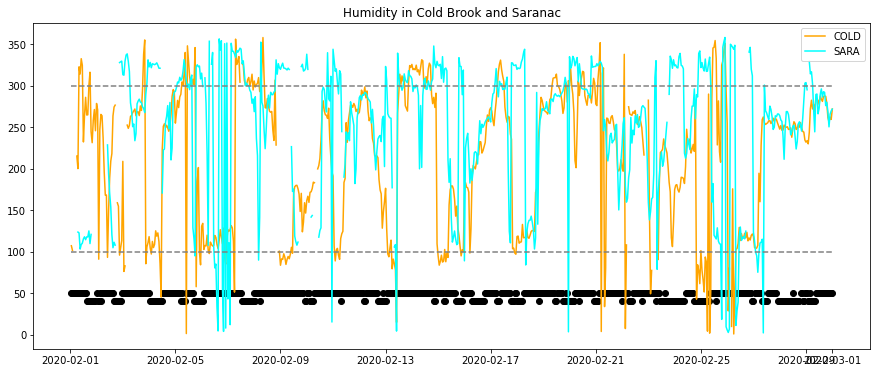

In [214]:
fig=plt.figure(figsize=(15,6))
plt.plot(time,cold_nan,color='orange',label='COLD')
plt.plot(time,sara_nan,color='cyan',label='SARA')
plt.scatter(time,line,color='black')
plt.plot(time,line300,color='gray',linestyle='dashed')
plt.plot(time,line100,color='gray',linestyle='dashed')
plt.title("Humidity in Cold Brook and Saranac")
plt.legend()

In [202]:
def get_daily_mean(time,data,startindex=0,test=False):
    """calculates for all days the mean value
    
    The hourly data are analyzed in 24 hour intervals
    and the mean data values are calculated using 24 time windows.
    The 24 period depends on the start position in the arrays. 
    Use the optional parameter to adjust the 24-hour intervals to 
    the preferred  day ranges.
    
    Input parameter:
        time (1-d numpy array): array with datetime values
        data (1-d numpy array): array with corresponding data values
        startindex (integer): optional parameter to change the start position in the arrays
        test (boolean): if True then this function prints some diagnostics to the screen
                        (defaut it is set False)
    Returns:
        day, mean:  numpy arrays (new size) with the dates (days) and daily mean
    """    
    d0=time[0]
    day0=d0.day
    hour0=d0.hour
    d1=d0+dt.timedelta(1)
    time_ret=[]
    mean_ret=[]
    while d0<=time[-1]:
        ifind=np.logical_and(time>=d0,time<d1)
        mtime=d0+(d1-d0)/2 # center time of the 24h window
        mdata=data[ifind].mean()
        time_ret.append(mtime)
        mean_ret.append(mdata)
        if test:
            print("date-range used: ")
            print(d0.strftime("%Y-%m-%d %H:%M:%S") + " to " + d1.strftime("%Y-%m-%d %H:%M:%S"))
            print(mtime.strftime("%Y-%m-%d"),np.round(mdata,4))
        # increment start and end dates by +24h
        d0=d1
        d1=d1+dt.timedelta(1)
    return np.array(time_ret), np.array(mean_ret)

In [203]:
x1,awnd_cold_mean = get_daily_mean(time,awnd_cold,startindex=0,test=True)

date-range used: 
2020-02-01 01:00:00 to 2020-02-02 01:00:00
2020-02-01 237.2542
date-range used: 
2020-02-02 01:00:00 to 2020-02-03 01:00:00
2020-02-02 193.575
date-range used: 
2020-02-03 01:00:00 to 2020-02-04 01:00:00
2020-02-03 231.3458
date-range used: 
2020-02-04 01:00:00 to 2020-02-05 01:00:00
2020-02-04 187.8583
date-range used: 
2020-02-05 01:00:00 to 2020-02-06 01:00:00
2020-02-05 248.6167
date-range used: 
2020-02-06 01:00:00 to 2020-02-07 01:00:00
2020-02-06 111.1292
date-range used: 
2020-02-07 01:00:00 to 2020-02-08 01:00:00
2020-02-07 261.8957
date-range used: 
2020-02-08 01:00:00 to 2020-02-09 01:00:00
2020-02-08 262.1125
date-range used: 
2020-02-09 01:00:00 to 2020-02-10 01:00:00
2020-02-09 130.5042
date-range used: 
2020-02-10 01:00:00 to 2020-02-11 01:00:00
2020-02-10 217.5136
date-range used: 
2020-02-11 01:00:00 to 2020-02-12 01:00:00
2020-02-11 199.5792
date-range used: 
2020-02-12 01:00:00 to 2020-02-13 01:00:00
2020-02-12 231.1708
date-range used: 
2020-02-13 

In [217]:
x1,awnd_sara_mean = get_daily_mean(time,awnd_sara,startindex=0,test=True)

date-range used: 
2020-02-01 01:00:00 to 2020-02-02 01:00:00
2020-02-01 181.5042
date-range used: 
2020-02-02 01:00:00 to 2020-02-03 01:00:00
2020-02-02 238.2667
date-range used: 
2020-02-03 01:00:00 to 2020-02-04 01:00:00
2020-02-03 290.0542
date-range used: 
2020-02-04 01:00:00 to 2020-02-05 01:00:00
2020-02-04 277.175
date-range used: 
2020-02-05 01:00:00 to 2020-02-06 01:00:00
2020-02-05 286.7792
date-range used: 
2020-02-06 01:00:00 to 2020-02-07 01:00:00
2020-02-06 205.3667
date-range used: 
2020-02-07 01:00:00 to 2020-02-08 01:00:00
2020-02-07 297.5125
date-range used: 
2020-02-08 01:00:00 to 2020-02-09 01:00:00
2020-02-08 271.2208
date-range used: 
2020-02-09 01:00:00 to 2020-02-10 01:00:00
2020-02-09 262.3875
date-range used: 
2020-02-10 01:00:00 to 2020-02-11 01:00:00
2020-02-10 222.6208
date-range used: 
2020-02-11 01:00:00 to 2020-02-12 01:00:00
2020-02-11 264.1042
date-range used: 
2020-02-12 01:00:00 to 2020-02-13 01:00:00
2020-02-12 261.7292
date-range used: 
2020-02-13 

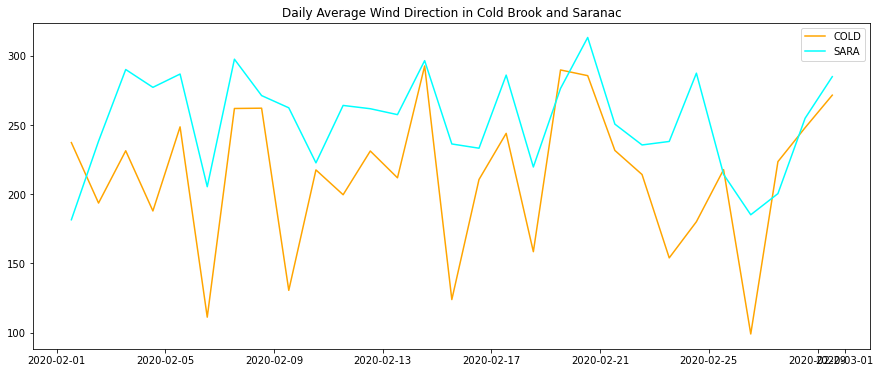

In [218]:
fig=plt.figure(figsize=(15,6))
plt.plot(x1,awnd_cold_mean,color='orange',label='COLD')
plt.plot(x2,awnd_sara_mean,color='cyan',label='SARA')
plt.title("Daily Average Wind Direction in Cold Brook and Saranac")
plt.legend()

In [219]:
line225=[]
i=0
for v in awnd_cold_mean:
    if v >= 0:
        line225.append(225)
    i=i+1

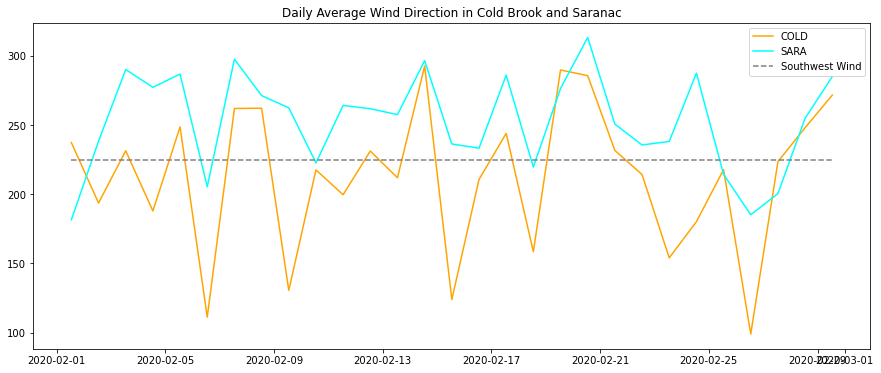

In [239]:
fig=plt.figure(figsize=(15,6))
plt.plot(x1,awnd_cold_mean,color='orange',label='COLD')
plt.plot(x1,awnd_sara_mean,color='cyan',label='SARA')
plt.plot(x1,line225,color='gray',linestyle='dashed',label='Southwest Wind')
plt.title("Daily Average Wind Direction in Cold Brook and Saranac")
plt.legend()
plt.show()